# The Classification of Pulsar Stars - Project Proposal
**By Oliver Gullery, Chan Le, Simon Lin, and Adam Parolin**

### Introduction

Pulsar stars are a rare type of neutron star that produces radio emissions that humans on earth can detect. Pulsars each produce different emission patterns which can be measured with scientific equipment. However, one issue is that some positive detections are caused by radio frequency interference which makes real pulsar star detections difficult to find. 

Pulsars are important as they are scientific instruments to space time, interstellar medium and states of matter. As a result, determining if scientific equipment analyzed a real pulsar star or radio frequency interference is the main objective of our data analysis.<br/> 

This leads into our question: 
__Using pulsar star candidate data recorded by scientific equipment, is a given candidate a true pulsar star or just radio frequency interference?__

Each observation in the provided data set is a candidate, with 8 continuous variables, and 1 class variable:<br />
1. Mean of the integrated profile. <br/>
2. Standard deviation of the integrated profile.<br />
3. Excess kurtosis of the integrated profile.<br />
4. Skewness of the integrated profile.<br />
5. Mean of the DM-SNR curve.<br />
6. Standard deviation of the DM-SNR curve.<br />
7. Excess kurtosis of the DM-SNR curve.<br />
8. Skewness of the DM-SNR curve.<br />


### Preliminary Exploratory Data Analysis

We can download the dataset from the website (https://archive.ics.uci.edu/ml/datasets/HTRU2) and import into Jupyter Hub. From there, we can preview the dataset and determine the appropriate read_* function to call. 


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#downloading from url 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
dir.create("data")
file <- download.file(url, "data/HTRU2.zip")

#reading data
#because the data we need is in a .zip file, we use the unzip() function in order to access "HTRU_2.csv"
star_data <- read_csv(unzip("data/HTRU2.zip", files = "HTRU_2.csv", exdir = "data/"), 
            col_names = c("mean_of_int_profiles", "sd_of_int_profiles", "excess_kurtosis_of_int_profiles",
            "skewness_of_int_profiles", "mean_of_curve", "sd_of_curve", 
            "excess_kurtosis_of_curve", "skewness_of_curve", "true_pulsar")) |>
    mutate(true_pulsar = as_factor(true_pulsar))
slice(star_data, 1:10)
# below is a snapshot of the star data we will be working with

Warning message in dir.create("data"):
“'data' already exists”
Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): mean_of_int_profiles, sd_of_int_profiles, excess_kurtosis_of_int_pr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_of_int_profiles,sd_of_int_profiles,excess_kurtosis_of_int_profiles,skewness_of_int_profiles,mean_of_curve,sd_of_curve,excess_kurtosis_of_curve,skewness_of_curve,true_pulsar
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.6996484,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.03146022,-0.1121676,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.15832276,0.3895404,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.45268802,0.1703474,2.3319398,14.486853,9.001004,107.97251,0


Now that we have our dataframe downloaded in a tidy format, our next step is to split the data into a training and testing set.

In [3]:
#DO NOT REMOVE
set.seed(9999) 

#splitting data into training and testing, with true_pulsar as the strata
pulsar_split <- initial_split(star_data, prop = 0.75, strata = true_pulsar)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

We will now perform some data analaysis on the training set. First, we will summarize the data to see how many observations are true or false pulsars.

In [4]:
#Summarizing data into table counting if its pulsar or not
pulsar_frequency <- pulsar_train |>
    group_by(true_pulsar) |>
    summarize(number = n())
pulsar_frequency

true_pulsar,number
<fct>,<int>
0,12207
1,1216


We create another table to summarize the mean of our intended predictor variables (we will discuss predictor variables more in the Methods section).

In [5]:
#Creating another table that shows the average of our intended predictor variables
pulsar_predictors <- pulsar_train |>
    summarize(avg_mean_of_int_profiles = mean(mean_of_int_profiles),
              avg_mean_of_curve = mean(mean_of_curve))

pulsar_predictors

avg_mean_of_int_profiles,avg_mean_of_curve
<dbl>,<dbl>
111.228,12.62098


Next, we will begin some visualization of our training data. We start by building a scatter plot with Mean of Integrated Profiles on the x-axis and Mean of DM-SNR Curve on the y-axis, with True Pulsars labeled by colour. We have started with this graph because it is the most relevant to any k-nearest-neighbour analysis we do in the future.

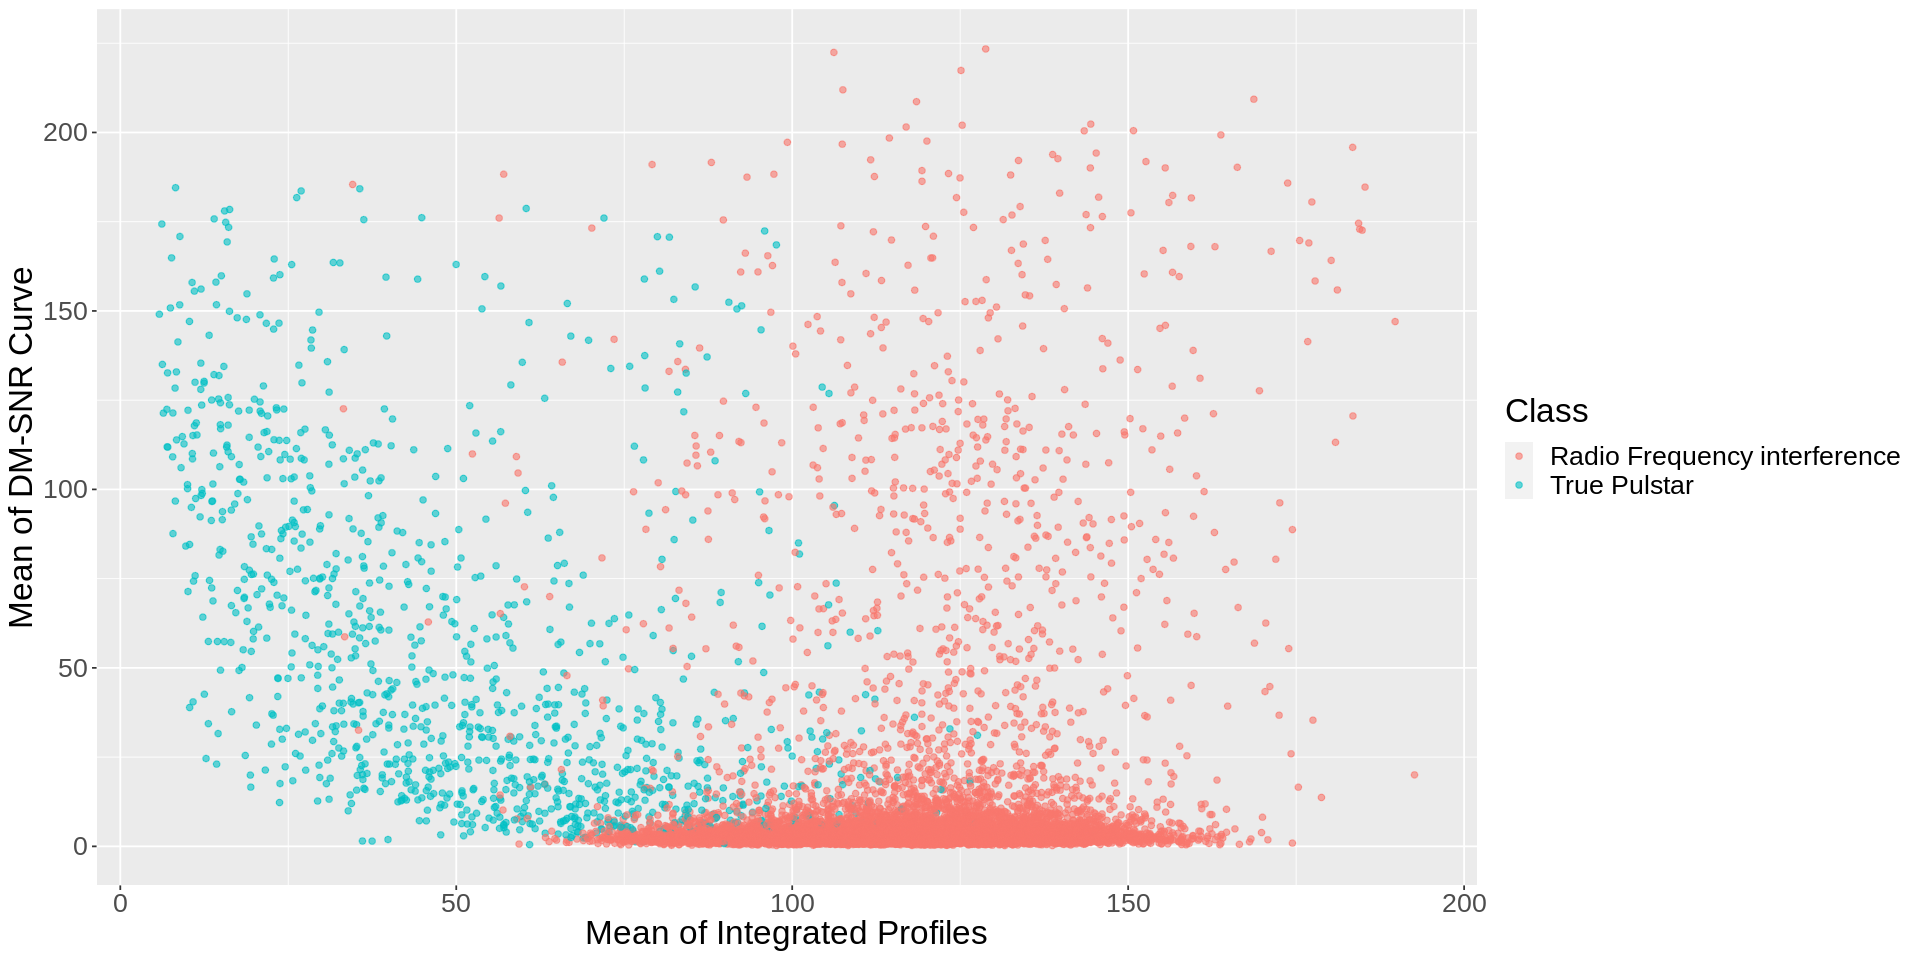

In [ ]:
#DO NOT REMOVE
set.seed(9999) 

#Visualizing the mean of integrated profiles and the mean of DM-SNR curve with colour to differentiate true pulars
options(repr.plot.width = 16, repr.plot.height = 8)

pulsar_plot <- pulsar_train |>
    ggplot(aes(x = mean_of_int_profiles, y = mean_of_curve)) +
           geom_point(aes(color = true_pulsar), alpha = 0.6) +
           labs(x = "Mean of Integrated Profiles", y = "Mean of DM-SNR Curve", color = "Class")+
           scale_color_discrete(labels=c('Radio Frequency interference', 'True Pulstar'))+ 
        theme(text = element_text(size = 20))


pulsar_plot

### Methods

#### Data Analysis Strategy and Predictor Variable Selection <br/>

Our classifier will use the K nearest neighbors classification algorithm. We will split the dataset into training and testing sets to evaluate the accuracy of the classifier. Furthermore, we will use the process of cross-validation in order to tune our model and select the most accurate k value. 

For our preliminary data analysis, we chose to use the Mean of Integrated Profiles and the Mean of DM-SNR Curve. We chose these two variables because the four of the variables describe the Integrated Profile and the other four describe the DM-SNR Curve, so it made sense to have one variable from each category. We specifically chose the Mean because we felt it to be the most representative and consistent trait compared to the other choices. Notice that these choices are only for the preliminary data analysis, and that we will take more steps.Since we have a large amount of data and a relatively small number of variables, we can apply the forward selection model in order to choose our predictor variables for the full analysis. 
<br/>
<br/>

#### Visualization Strategy


We will first visualize our data set using a scatter plot, with the predictor variables on the x and y axes. We will also color the points based on class. This will give us a sense of what patterns we might expect in the data due to the nature of visual representation. For example, if there is a large cluster of points that are pulsar stars, then unknown candidates that are nearby on the plot may likely be pulsar stars as well.

During the process of training our model and choosing a k value,  we will use a line plot in order to help us determine the k value with the highest accuracy. This line plot will have accuracy on the x-axis and k on the y-axis and also have points that are connected by the lines.



### Expected Outcomes and Signifance

#### Expected Findings <br/>

Through analyzing information on the integrated pulse profile as well as the DM-SNR curve, we can predict the nature of a radio frequency signal in order to find out if an individual candidate is a true pulsar star or not. Through this, we may also be able to find how exactly the Integrated Profile and DM-SNR Curve affect which observations are true or false.
<br/>

#### Impacts <br/>

Utilizing computational power to effectively predict whether candidate data is a true pulsar star will allow us to efficiently sort and ignore data that we predict to be radio frequency interference. Ultimately, this would optimize pulsar star research, and speed up scientific progress related to pulsar stars, such as space time, the interstellar medium, and states of matter.
<br/>

#### Future Questions <br/>
Possible future questions include:
